In [2]:
!pip install scikit-learn
!pip install matplotlib
!pip install numpy

     |████████████████████████████████| 6.8 MB 3.2 MB/s eta 0:00:01     |██████████████████▉             | 4.0 MB 3.2 MB/s eta 0:00:01     |██████████████████████████▌     | 5.6 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 300 kB 56.4 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 43.5 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 46.6 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 3.3 MB/s eta 0:00:01 0:00:01
     |████████████████████████████████| 2.2 MB 42.8 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 8.4 MB/s  eta 0:00:01


In [3]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [5]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
print(lfw_people)

{'data': array([[254.      , 254.      , 251.66667 , ...,  87.333336,  88.666664,
         86.666664],
       [ 39.666668,  50.333332,  47.      , ..., 117.666664, 115.      ,
        133.66667 ],
       [ 89.333336, 104.      , 126.      , ..., 175.33333 , 183.33333 ,
        183.      ],
       ...,
       [ 86.      ,  80.333336,  74.666664, ...,  44.      ,  49.666668,
         44.666668],
       [ 50.333332,  65.666664,  88.      , ..., 197.      , 179.33333 ,
        166.33333 ],
       [ 30.      ,  27.      ,  32.666668, ...,  35.      ,  35.333332,
         61.      ]], dtype=float32), 'images': array([[[254.      , 254.      , 251.66667 , ...,  65.333336,
          50.666668,  40.333332],
        [253.33333 , 251.33333 , 247.33333 , ...,  66.666664,
          52.      ,  42.666668],
        [240.66667 , 231.66667 , 211.66667 , ...,  62.      ,
          49.      ,  42.      ],
        ...,
        [ 74.333336,  54.      ,  31.666666, ...,  97.666664,
          93.      ,  90.

In [6]:
lfw_people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [7]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

In [8]:
n_samples  # This sample Face 

1288

In [9]:
h  # this is Height of the image 

50

In [10]:
w # width of a image

37

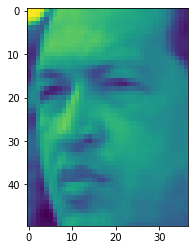

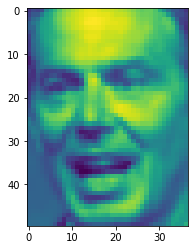

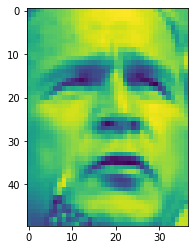

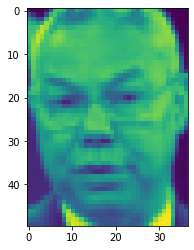

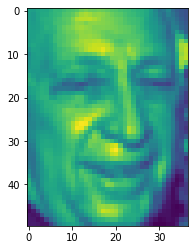

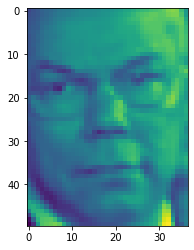

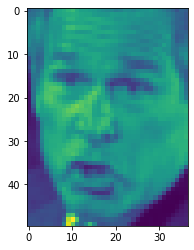

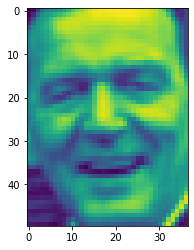

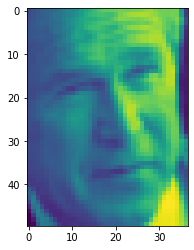

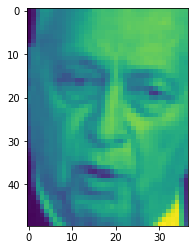

In [13]:
for i in range(10):
    plt.imshow(lfw_people.images[i])
    plt.show()

In [14]:
X = lfw_people.data
n_features = X.shape[1]

In [15]:
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [16]:
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [18]:
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 966 faces
done in 11.421s


In [19]:
eigenfaces =pca.components_.reshape((n_components,h,w))

In [20]:
print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Projecting the input data on the eigenfaces orthonormal basis
done in 0.318s


In [21]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 58.952s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [22]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
done in 0.111s
                   precision    recall  f1-score   support

     Ariel Sharon       0.93      0.62      0.74        21
     Colin Powell       0.88      0.91      0.90        58
  Donald Rumsfeld       0.96      0.82      0.88        28
    George W Bush       0.83      0.95      0.89       129
Gerhard Schroeder       1.00      0.96      0.98        27
      Hugo Chavez       1.00      0.64      0.78        22
       Tony Blair       0.86      0.84      0.85        37

         accuracy                           0.88       322
        macro avg       0.92      0.82      0.86       322
     weighted avg       0.89      0.88      0.88       322

[[ 13   4   1   3   0   0   0]
 [  0  53   0   5   0   0   0]
 [  0   1  23   4   0   0   0]
 [  1   2   0 123   0   0   3]
 [  0   0   0   0  26   0   1]
 [  0   0   0   7   0  14   1]
 [  0   0   0   6   0   0  31]]


In [23]:
def plot_gallery(images,titles,h,w,n_row=3,n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row*n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [24]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

In [25]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

In [26]:
prediction_titles

['predicted: Rumsfeld\ntrue:      Rumsfeld',
 'predicted: Schroeder\ntrue:      Schroeder',
 'predicted: Bush\ntrue:      Bush',
 'predicted: Bush\ntrue:      Bush',
 'predicted: Rumsfeld\ntrue:      Rumsfeld',
 'predicted: Bush\ntrue:      Bush',
 'predicted: Bush\ntrue:      Bush',
 'predicted: Rumsfeld\ntrue:      Rumsfeld',
 'predicted: Bush\ntrue:      Bush',
 'predicted: Sharon\ntrue:      Sharon',
 'predicted: Sharon\ntrue:      Sharon',
 'predicted: Blair\ntrue:      Blair',
 'predicted: Bush\ntrue:      Rumsfeld',
 'predicted: Schroeder\ntrue:      Schroeder',
 'predicted: Bush\ntrue:      Bush',
 'predicted: Powell\ntrue:      Powell',
 'predicted: Schroeder\ntrue:      Schroeder',
 'predicted: Schroeder\ntrue:      Schroeder',
 'predicted: Chavez\ntrue:      Chavez',
 'predicted: Powell\ntrue:      Rumsfeld',
 'predicted: Powell\ntrue:      Powell',
 'predicted: Bush\ntrue:      Bush',
 'predicted: Bush\ntrue:      Rumsfeld',
 'predicted: Chavez\ntrue:      Chavez',
 'predic

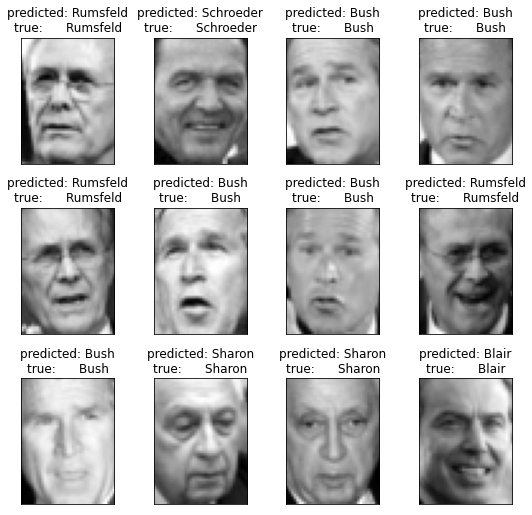

In [27]:
plot_gallery(X_test,prediction_titles,h,w)

In [28]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

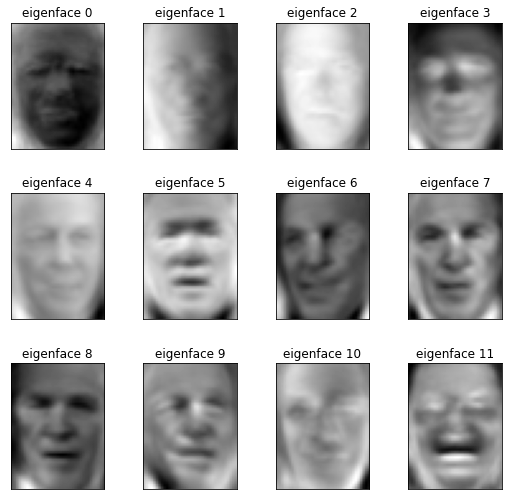

In [29]:
plot_gallery(eigenfaces,eigenface_titles,h,w)